# Machine Learning: Use cases in FINTECH - Predicting the Likelihood of E-Signing a Loan Based on Financial History

- The data for these projects are manufactured fields based on trends found in real-world case studies. The fields describe what companies usually track from their users, and the distributions are based on observed distributions in the real-world analysis. This means that, although the data has been artificially created, the patterns, associations, and distributions are not random.


- The data serves as a good representation of what you may encounter in the workplace. That is, the data is rarely clean, and a lot of pre-processing is needed to get it ready for modeling.
***


# 1. INTRODUCTION

Lending companies work by analyzing the financial history of their loan applicants and choosing whether or not the applicant is too risky to be given a loan. If the applicant is not, the company then determines the terms of the loan. To acquire these applicants, companies can organically receive them through their websites/ apps, often with the help of advertisement companies. Other times, lending companies partner with peer-to-peer (P2P) lending marketplaces, in order to acquire leads of possible applicants. Some examples of the marketplace include Upstart, Lending Tree, and Lending Club. In this project, we are going to asses the 'quality' of the leads our company receives from these marketplaces.

- **Market:** The target audience is the set of loan applicants who reached out through an intermediary marketplace.
- **Product:** A loan.
- **Goal:** Develop a model to predict for 'quality' applicants are those who reach a key part of the loan application process.
****

# 2. BUSINESS CHALLENGE

- In this Case Study, we will be working for a fin-tech company that specializes in loans. It offers low APR loans to applicants based on their financial habits, as almost all lending companies do. This company has partnered with a P2P lending marketplace that provides real-time leads (loan applicants). The numbers of conversations from these leads are satisfactory.
- The company tasks you with creating a model that predicts whether or not these leads will complete the electronic signature phase of the loan applicant (a.k.a. e_signed). The company seeks to leverage this model to identify less 'qualify' applicants (e.g. those who are not responding to the onboarding process) and experiment with giving them different onboarding screens.
- The reason for selecting the e_signing process as the response variable is due to the structure of the loan application.
- The official application begins with the lead arriving on our website after we opted to acquire it. Here, The applicant begins the onboarding process to apply for a loan. The user begins to provide more financial information by going over every screen of the onboarding process. This first phase ends with the applicant providing his/ her signature indicating all of the given information is correct.
- Any of the following screens, in which the applicant is approved/denied and given the terms of the loan, is dependent on the company, not the applicant stops having control of the application process.
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float', '{:.2f}'.format)

In [2]:
data = pd.read_csv("data/Financial-Data.csv")
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.74,0.90,0.49,0.52,0.58,0.38,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.74,0.88,0.71,0.83,0.73,0.63,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.64,0.77,0.60,0.76,0.53,0.53,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.67,0.96,0.77,0.78,0.79,0.59,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.62,0.86,0.61,0.67,0.74,0.74,12,0


# 3. DATA

- Because the applicants arrived through a marketplace, we have access to their financial data before the onboarding process begins. This data includes personal information like age, and time employed, as well as other financial metrics. Our company utilizes these financial data points to create risk scores based on many different risk factors.

- In this case study, we are given the set of scores from algorithms built by the finance and engineering teams. Furthermore, the marketplace itself provides us with their own lead quality scores. We will leverage both sets of scores, as well as small list of personal/financial features to predict if the user is likely to respond to our current onboarding process.
****

In [3]:
data.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

# 4. EXPLORATORY DATA ANALYSIS

In [4]:
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00
mean,5596977.62,43.02,0.43,3657.21,1.19,3.53,3.58,3.43,3.50,0.80,950.45,61086.30,0.69,0.88,0.58,0.72,0.62,0.62,6.46,0.54
std,2562472.75,11.87,0.49,1504.89,2.40,2.26,2.75,2.22,1.96,0.40,698.54,15394.26,0.09,0.05,0.13,0.12,0.14,0.14,3.67,0.50
min,1111398.00,18.00,0.00,905.00,0.00,0.00,0.00,0.00,0.00,0.00,350.00,2100.00,0.02,0.45,0.02,0.15,0.01,0.01,1.00,0.00
25%,3378998.75,34.00,0.00,2580.00,0.00,2.00,2.00,2.00,2.00,1.00,600.00,49350.00,0.64,0.85,0.50,0.63,0.52,0.52,4.00,0.00
50%,5608376.00,42.00,0.00,3260.00,0.00,3.00,3.00,2.00,3.00,1.00,700.00,61200.00,0.70,0.88,0.59,0.73,0.63,0.62,6.00,1.00
75%,7805624.25,51.00,1.00,4670.00,1.00,5.00,5.00,5.00,4.00,1.00,1100.00,72750.00,0.75,0.91,0.67,0.81,0.73,0.73,8.00,1.00
max,9999874.00,96.00,1.00,9985.00,11.00,16.00,12.00,11.00,15.00,1.00,10200.00,99750.00,1.00,1.00,0.98,1.00,0.97,0.97,30.00,1.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [6]:
data.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [7]:
data.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

In [8]:
categorical_col = []

for column in data.columns:
    print(f"===== {column.upper()} =====")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Minimum {data[column].min()}")
    print(f"Maximum {data[column].max()}") 
    if data[column].nunique() <= 20:
        categorical_col.append(column)

===== ENTRY_ID =====
Number of unique values: 17888
Minimum 1111398
Maximum 9999874
===== AGE =====
Number of unique values: 72
Minimum 18
Maximum 96
===== PAY_SCHEDULE =====
Number of unique values: 4
Minimum bi-weekly
Maximum weekly
===== HOME_OWNER =====
Number of unique values: 2
Minimum 0
Maximum 1
===== INCOME =====
Number of unique values: 2284
Minimum 905
Maximum 9985
===== MONTHS_EMPLOYED =====
Number of unique values: 12
Minimum 0
Maximum 11
===== YEARS_EMPLOYED =====
Number of unique values: 17
Minimum 0
Maximum 16
===== CURRENT_ADDRESS_YEAR =====
Number of unique values: 13
Minimum 0
Maximum 12
===== PERSONAL_ACCOUNT_M =====
Number of unique values: 12
Minimum 0
Maximum 11
===== PERSONAL_ACCOUNT_Y =====
Number of unique values: 16
Minimum 0
Maximum 15
===== HAS_DEBT =====
Number of unique values: 2
Minimum 0
Maximum 1
===== AMOUNT_REQUESTED =====
Number of unique values: 98
Minimum 350
Maximum 10200
===== RISK_SCORE =====
Number of unique values: 1411
Minimum 2100
Maximum 9

In [9]:
data.e_signed.value_counts()

1    9639
0    8269
Name: e_signed, dtype: int64

### Visualisation of the Features distributions

In [10]:
len(data.columns)

21

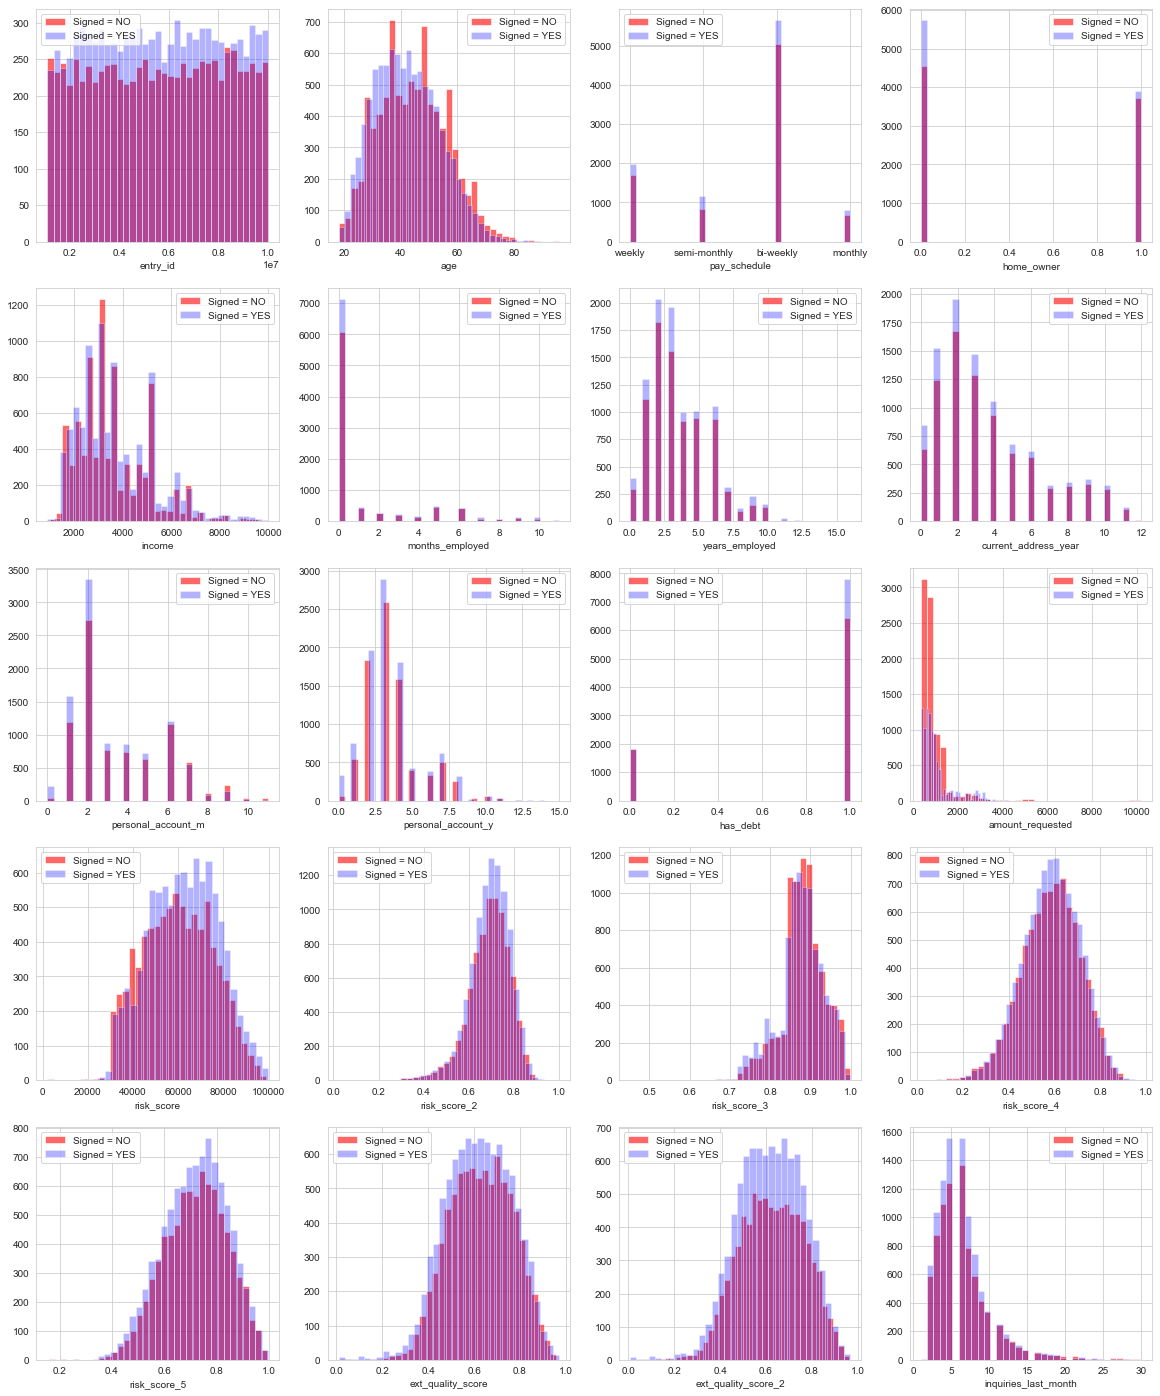

In [11]:
plt.figure(figsize=(20, 30))
for i, column in enumerate(data.drop('e_signed', axis=1).columns, 1):
    plt.subplot(6, 4, i)
    data[data["e_signed"] == 0][column].hist(bins=35, color='red', label='Signed = NO', alpha=0.6)
    data[data["e_signed"] == 1][column].hist(bins=35, color='blue', label='Signed = YES', alpha=0.3)
    plt.legend()
    plt.xlabel(column)

We are going to separate features into two categories:
1. Features related to the applicant (demographic variables such as occupation, employment details etc.),
2. Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)

In [12]:
loan_features = ['amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
                 'risk_score_4', 'risk_score_5', 'ext_quality_score', 'ext_quality_score_2', 
                 'inquiries_last_month']
personal_features = ['age', 'pay_schedule', 'home_owner', 'income', 'months_employed', 
                     'years_employed', 'current_address_year', 'personal_account_m', 
                     'personal_account_y', 'has_debt']

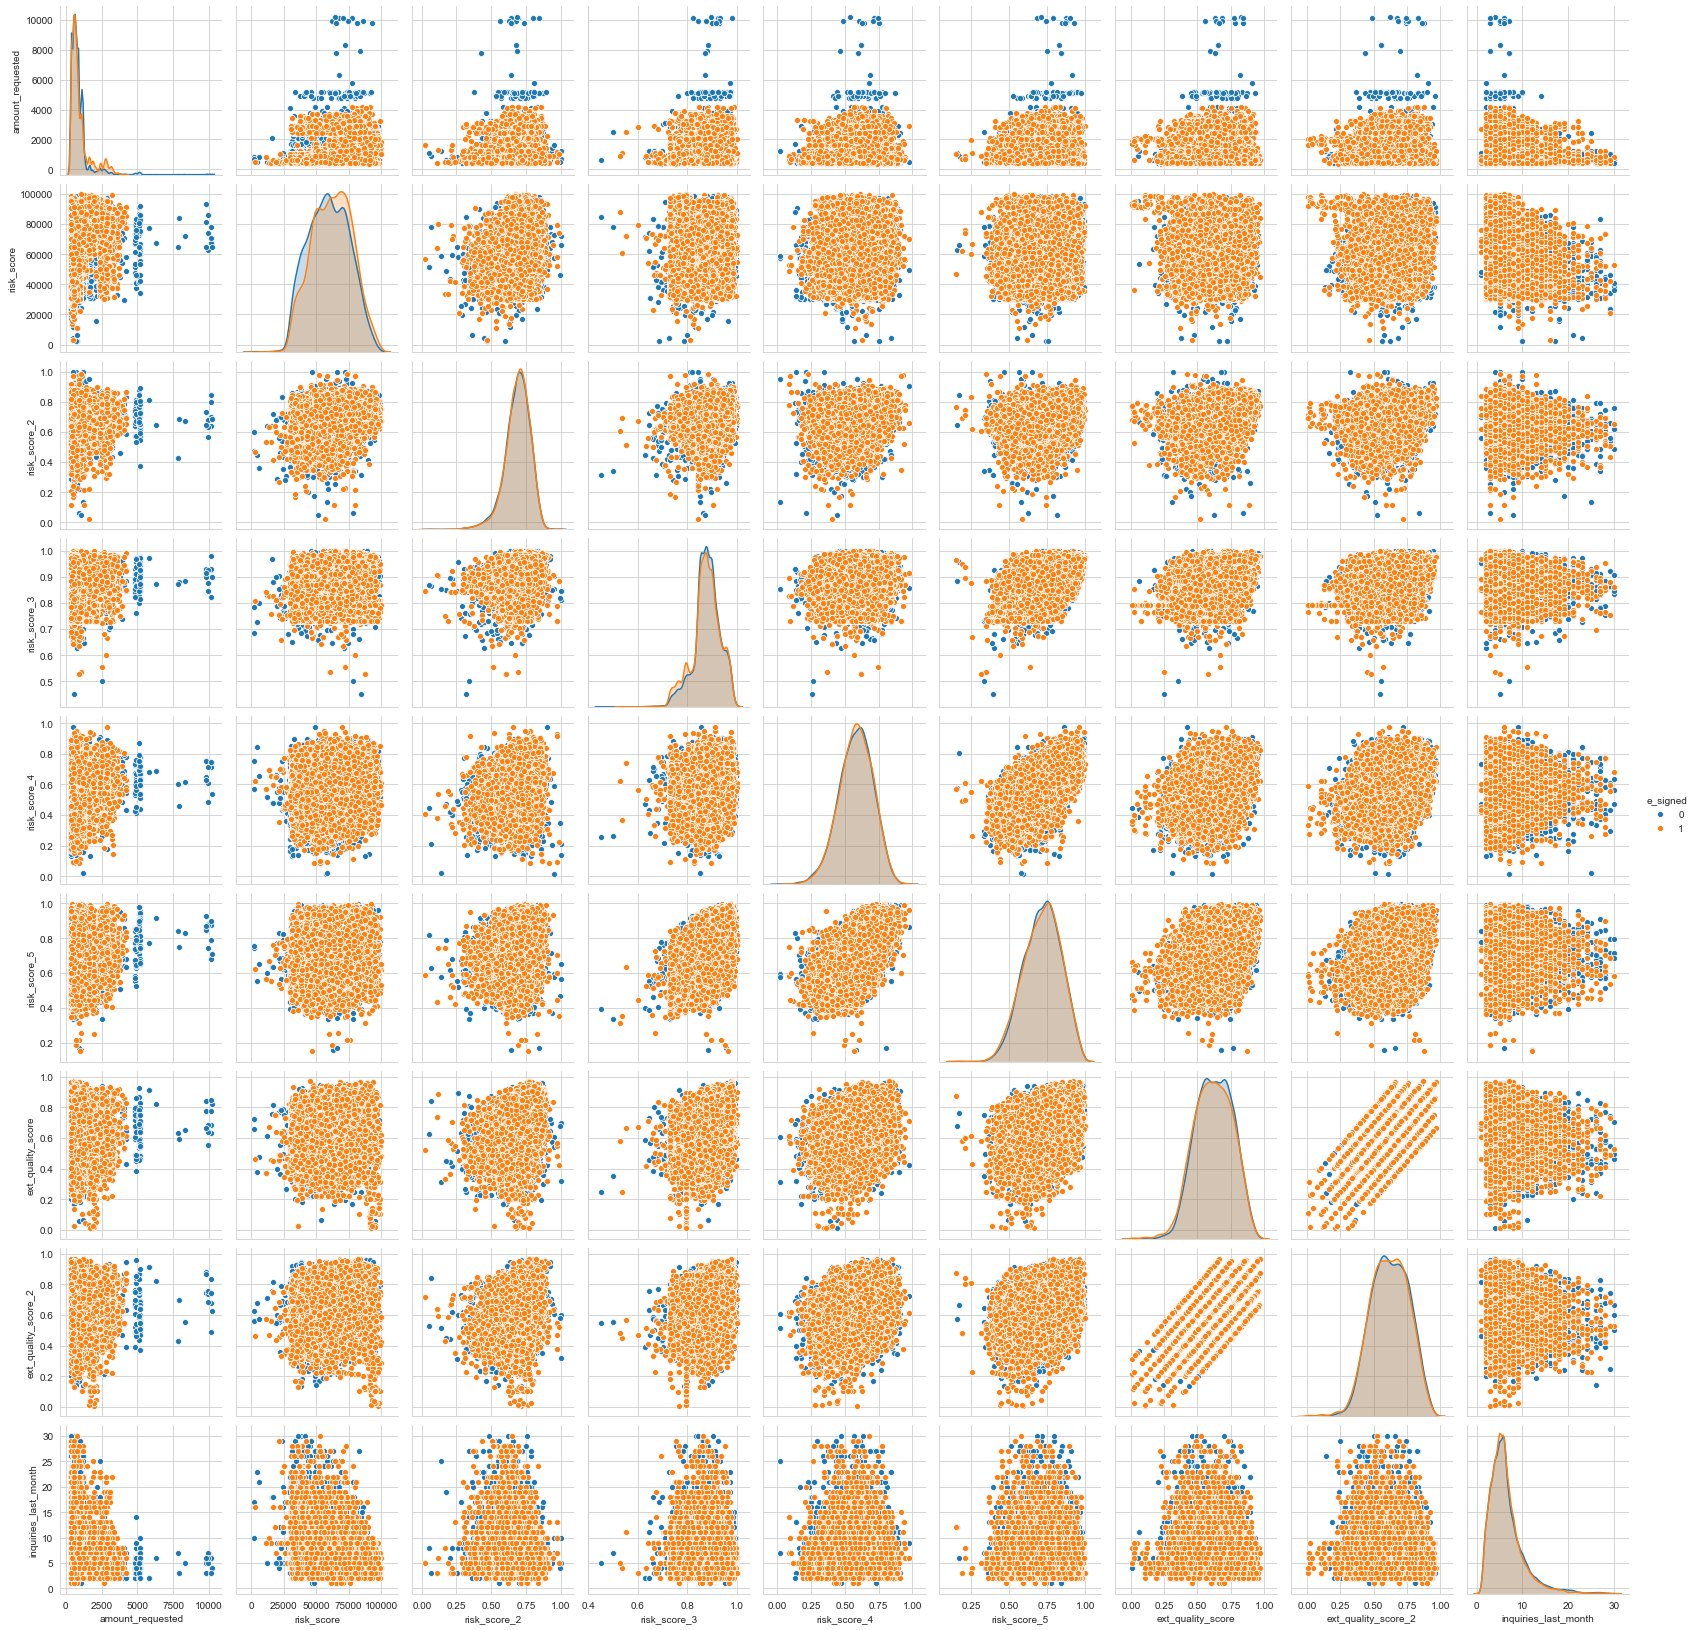

In [13]:
col = [column for column in loan_features if data[column].nunique() > 20] + ['e_signed']
sns.pairplot(data=data[col], hue='e_signed')

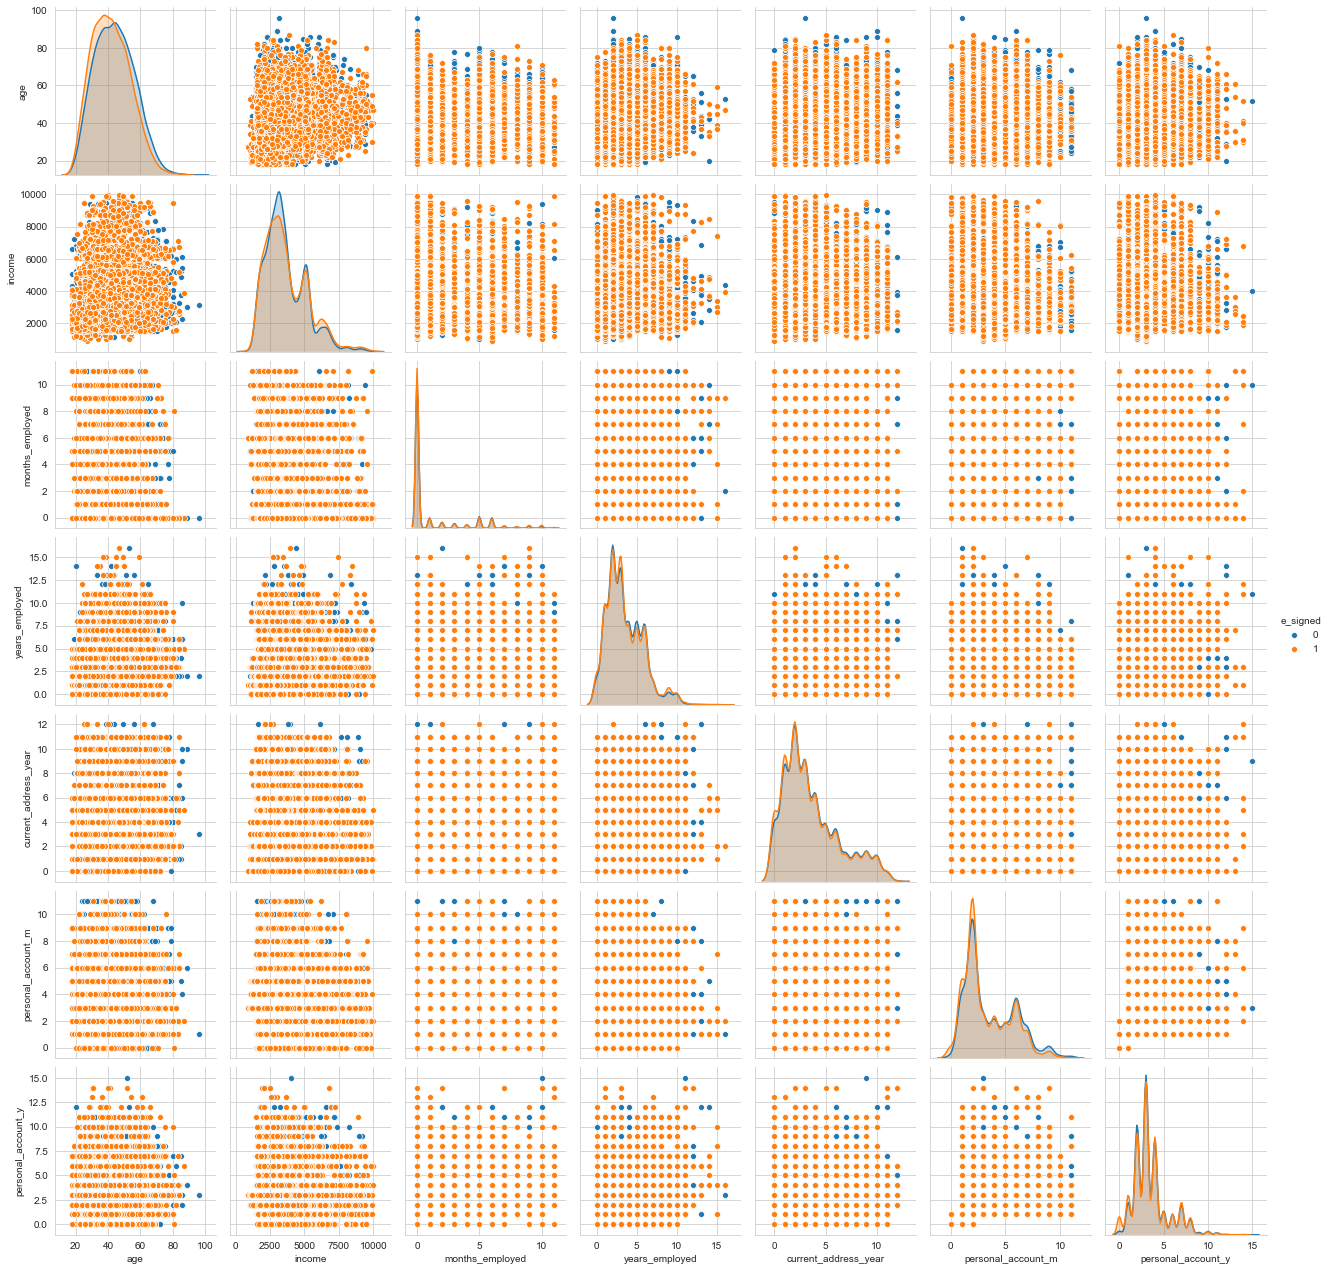

In [14]:
col = [column for column in personal_features if data[column].nunique() > 10] + ['e_signed']
sns.pairplot(data=data[col], hue='e_signed')

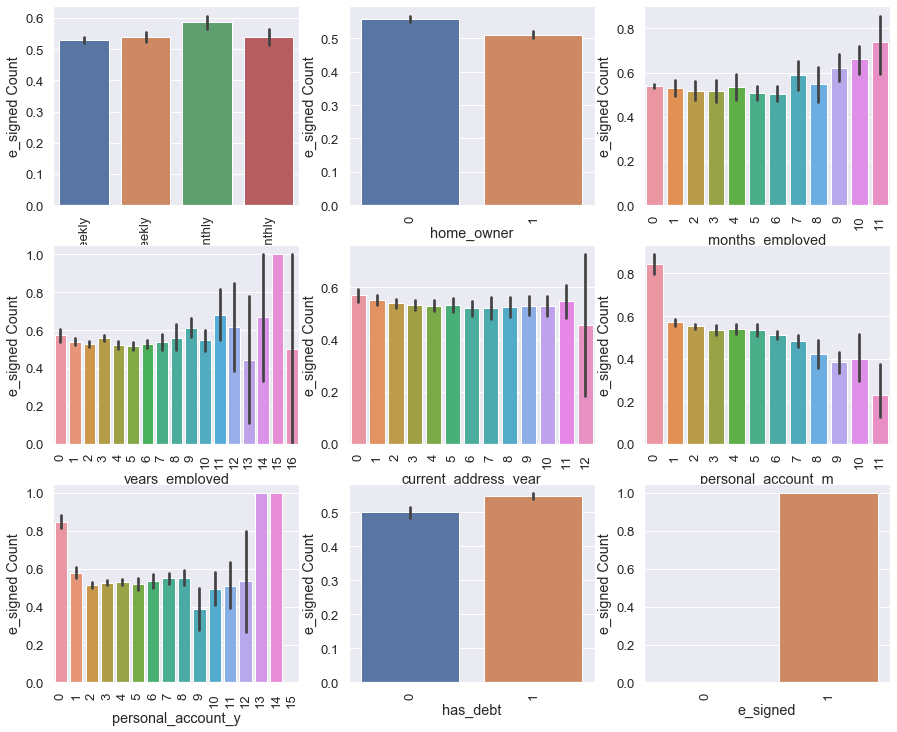

In [15]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(7, 3, i)
    g = sns.barplot(x=f"{column}", y='e_signed', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('e_signed Count')
    plt.xlabel(f'{column}')

### Correlation analysis

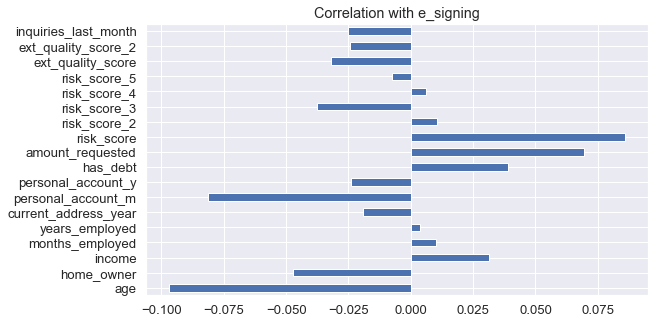

In [16]:
col = ['entry_id', 'e_signed']
data.drop(col, axis=1).corrwith(data.e_signed).plot(kind='barh', figsize=(9, 5), 
                                                    grid=True, 
                                                    title='Correlation with e_signing')

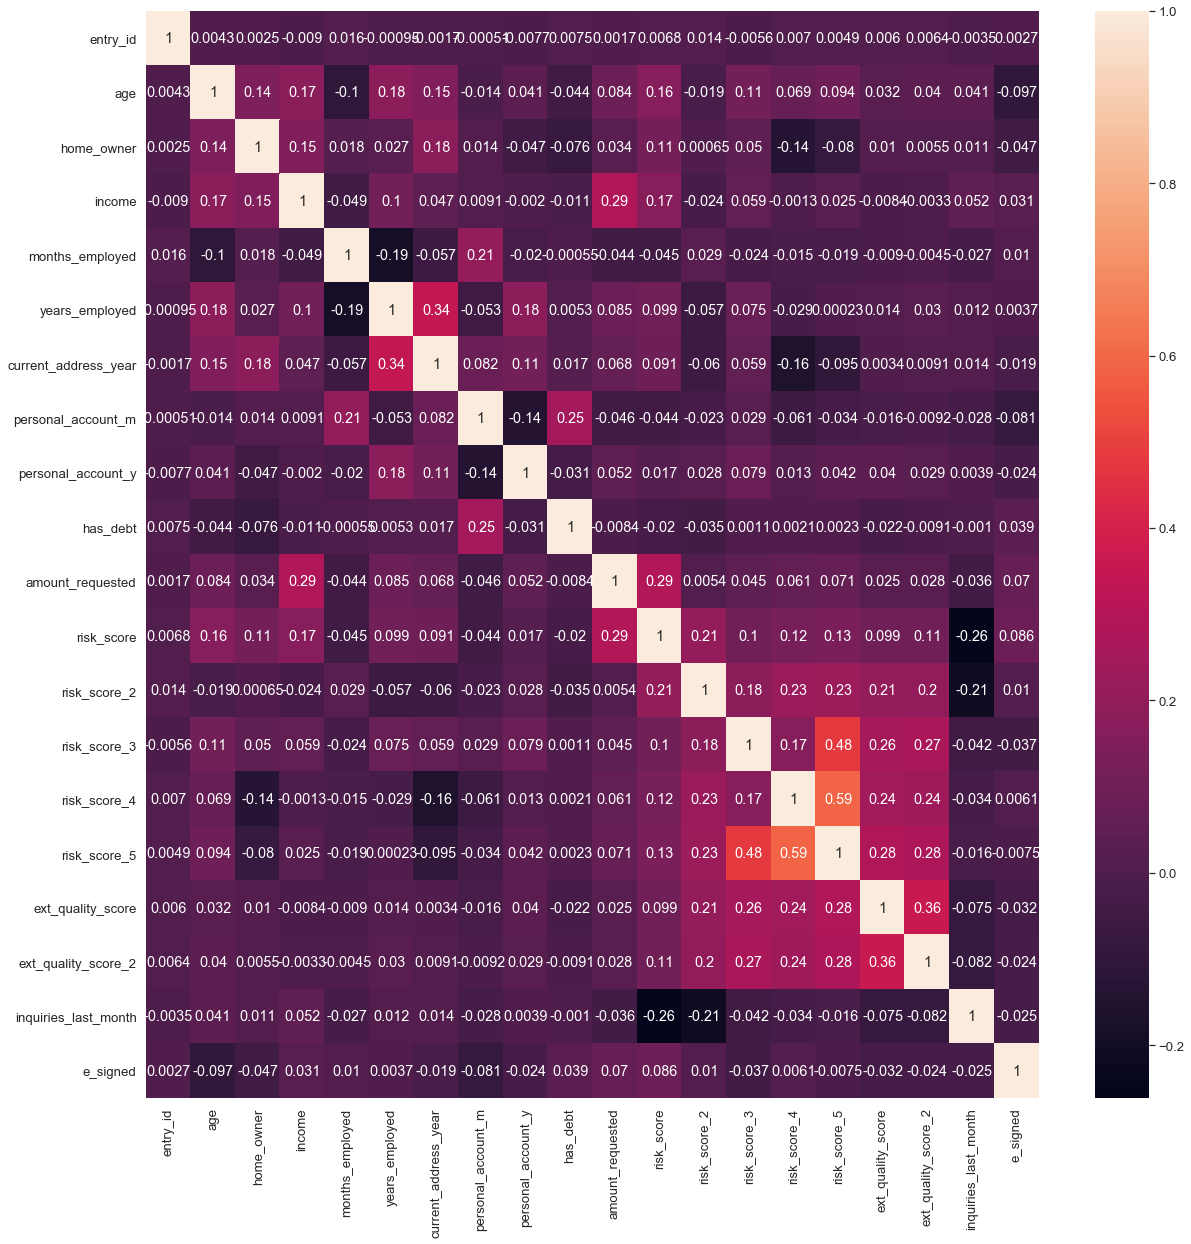

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

# 5. DATA PREPROCESSING

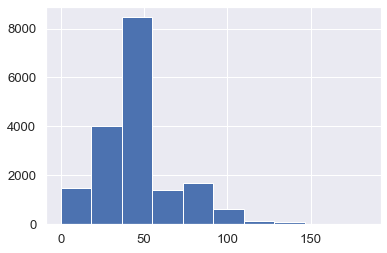

In [18]:
data['personal_account_months'] = (data.personal_account_m + (data.personal_account_y * 12))
data.personal_account_months.hist()

In [19]:
columns = ['personal_account_m', 'personal_account_y', 'months_employed', 'entry_id']
data.drop(columns, axis=1, inplace=True)

In [20]:
data.head()

,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,40,bi-weekly,1,3135,3,3,1,550,36200,0.74,0.90,0.49,0.52,0.58,0.38,10,1,30
1,61,weekly,0,3180,6,3,1,600,30150,0.74,0.88,0.71,0.83,0.73,0.63,9,0,86
2,23,weekly,0,1540,0,0,1,450,34550,0.64,0.77,0.60,0.76,0.53,0.53,7,0,19
3,40,bi-weekly,0,5230,6,1,1,700,42150,0.67,0.96,0.77,0.78,0.79,0.59,8,1,86
4,33,semi-monthly,0,3590,5,2,1,1100,53850,0.62,0.86,0.61,0.67,0.74,0.74,12,0,98


### One Hot-encoding

In [21]:
categorical_col = []

for column in data.columns:
    if 2 < data[column].nunique() <= 20:
        categorical_col.append(column)
        
categorical_col

['pay_schedule', 'years_employed', 'current_address_year']

In [22]:
categorical_col.remove('years_employed')
data[categorical_col]

,pay_schedule,current_address_year
0,bi-weekly,3
1,weekly,3
2,weekly,0
3,bi-weekly,1
4,semi-monthly,2
...,...,...
17903,monthly,3
17904,bi-weekly,1
17905,weekly,1
17906,bi-weekly,5


In [23]:
data_1 = pd.get_dummies(data, columns=categorical_col, drop_first=True, dtype='uint8')

In [24]:
data_1.dtypes

age                            int64
home_owner                     int64
income                         int64
years_employed                 int64
has_debt                       int64
amount_requested               int64
risk_score                     int64
risk_score_2                 float64
risk_score_3                 float64
risk_score_4                 float64
risk_score_5                 float64
ext_quality_score            float64
ext_quality_score_2          float64
inquiries_last_month           int64
e_signed                       int64
personal_account_months        int64
pay_schedule_monthly           uint8
pay_schedule_semi-monthly      uint8
pay_schedule_weekly            uint8
current_address_year_1         uint8
current_address_year_2         uint8
current_address_year_3         uint8
current_address_year_4         uint8
current_address_year_5         uint8
current_address_year_6         uint8
current_address_year_7         uint8
current_address_year_8         uint8
c

### Search for duplicat rows and features

In [25]:
print(data_1.shape)

# Remove duplicate Features
data_1 = data_1.T.drop_duplicates()
data_1 = data_1.T

# Remove Duplicate Rows
data_1.drop_duplicates(inplace=True)

print(data_1.shape)

(17908, 31)
(17908, 31)


In [26]:
from sklearn.model_selection import train_test_split

X = data_1.drop('e_signed', axis=1)
y = data_1.e_signed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n") 

In [28]:
from sklearn.model_selection import cross_val_score

def cross_validation(model, model_name):
    scores = cross_val_score(model, X, y, cv=3)
    print('_' * 60)
    print(scores)
    print(f"{model_name} Cross Validation Score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

# 6. MODEL BUILDING

## 1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(lr_classifier, X_train, y_train, X_test, y_test, train=False)
cross_validation(lr_classifier, 'Logistic Regression')

Train Result:
Accuracy Score: 58.09%
_______________________________________________
Classification Report:	Precision Score: 58.90%
			Recall Score: 72.82%
			F1 score: 65.12%
_______________________________________________
Confusion Matrix: 
 [[2376 3423]
 [1831 4905]]

Test Result:
Accuracy Score: 57.58%
_______________________________________________
Classification Report:	Precision Score: 58.93%
			Recall Score: 70.93%
			F1 score: 64.37%
_______________________________________________
Confusion Matrix: 
 [[1035 1435]
 [ 844 2059]]

____________________________________________________________
[0.56599665 0.57781873 0.5724577 ]
Logistic Regression Cross Validation Score: 57.21% +/- (0.48)


## 2. Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

print_score(svm_clf, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svm_clf, X_train_std, y_train, X_test_std, y_test, train=False)
# cross_validation(svm_clf, 'Support Vector Machine')

Train Result:
Accuracy Score: 58.22%
_______________________________________________
Classification Report:	Precision Score: 58.79%
			Recall Score: 74.39%
			F1 score: 65.68%
_______________________________________________
Confusion Matrix: 
 [[2287 3512]
 [1725 5011]]

Test Result:
Accuracy Score: 57.68%
_______________________________________________
Classification Report:	Precision Score: 58.78%
			Recall Score: 72.51%
			F1 score: 64.93%
_______________________________________________
Confusion Matrix: 
 [[ 994 1476]
 [ 798 2105]]

____________________________________________________________
[0.56164154 0.57296029 0.56441615]
Support Vector Machine Cross Validation Score: 56.63% +/- (0.48)


In [31]:
from sklearn.model_selection import GridSearchCV

svm_model = SVC(kernel='rbf')
params = {"C":(0.1, 1, 5, 10), 
          "gamma":(0.001, 0.01, 0.1, 0.5, 1)}

svm_grid = GridSearchCV(svm_model, params, n_jobs=-1, cv=3, 
                        verbose=1, scoring="accuracy")

svm_grid.fit(X_train_std, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': (0.1, 1, 5, 10),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [32]:
svm_grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
svm_clf = SVC(C=10, gamma=0.01, kernel='rbf')
svm_clf.fit(X_train_std, y_train)

print_score(svm_clf, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svm_clf, X_train_std, y_train, X_test_std, y_test, train=False)

# X need to be scaled
# cross_validation(svm_clf, 'Support Vector Machine')

Train Result:
Accuracy Score: 67.28%
_______________________________________________
Classification Report:	Precision Score: 66.81%
			Recall Score: 77.70%
			F1 score: 71.85%
_______________________________________________
Confusion Matrix: 
 [[3199 2600]
 [1502 5234]]

Test Result:
Accuracy Score: 59.50%
_______________________________________________
Classification Report:	Precision Score: 60.91%
			Recall Score: 69.93%
			F1 score: 65.11%
_______________________________________________
Confusion Matrix: 
 [[1167 1303]
 [ 873 2030]]

____________________________________________________________
[0.53919598 0.53861618 0.53844865]
Support Vector Machine Cross Validation Score: 53.88% +/- (0.03)


## 3. Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1500, 
                                bootstrap=True)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)
cross_validation(rf_clf, 'Random Forest')

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[5799    0]
 [   0 6736]]

Test Result:
Accuracy Score: 63.17%
_______________________________________________
Classification Report:	Precision Score: 64.79%
			Recall Score: 69.72%
			F1 score: 67.16%
_______________________________________________
Confusion Matrix: 
 [[1370 1100]
 [ 879 2024]]

____________________________________________________________
[0.6279732  0.63343944 0.63746021]
Random Forest Cross Validation Score: 63.30% +/- (0.39)


In [63]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier(n_estimators=1000, bootstrap=False)

# param_grid = {'n_estimators':[1000],
#               'max_depth':[15], 
#               'min_samples_split':[3], 
#               'min_samples_leaf':[1], 
#               'criterion':["gini"],
#               'max_features':['sqrt'],
#               'warm_start':[True],
#               'bootstrap':[False]}

# rf_grid_cv = GridSearchCV(rf, param_grid, scoring="accuracy", n_jobs=-1,
#                                  verbose=1, cv=3)
# rf_grid_cv.fit(X_train, y_train)

In [64]:
# rf_grid_cv.best_estimator_

In [66]:
rf_clf = RandomForestClassifier(criterion='gini',
                                max_depth=15,
                                min_samples_leaf=1, 
                                min_samples_split=3,
                                n_estimators=500,
                                max_features='sqrt',
                                warm_start=True,
                                bootstrap=False)

rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)
cross_validation(rf_clf, 'Random Forest')

Train Result:
Accuracy Score: 95.96%
_______________________________________________
Classification Report:	Precision Score: 94.79%
			Recall Score: 97.86%
			F1 score: 96.30%
_______________________________________________
Confusion Matrix: 
 [[5437  362]
 [ 144 6592]]

Test Result:
Accuracy Score: 63.02%
_______________________________________________
Classification Report:	Precision Score: 64.40%
			Recall Score: 70.55%
			F1 score: 67.34%
_______________________________________________
Confusion Matrix: 
 [[1338 1132]
 [ 855 2048]]

____________________________________________________________
[0.62562814 0.63796281 0.638968  ]
Random Forest Cross Validation Score: 63.42% +/- (0.61)


## 4. XGBoost

In [59]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.1, 
                        n_estimators=150, 
                        base_score=0.1)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)
cross_validation(xgb_clf, 'XGBoost')

Train Result:
Accuracy Score: 68.07%
_______________________________________________
Classification Report:	Precision Score: 68.36%
			Recall Score: 75.56%
			F1 score: 71.78%
_______________________________________________
Confusion Matrix: 
 [[3443 2356]
 [1646 5090]]

Test Result:
Accuracy Score: 63.61%
_______________________________________________
Classification Report:	Precision Score: 64.93%
			Recall Score: 71.00%
			F1 score: 67.83%
_______________________________________________
Confusion Matrix: 
 [[1357 1113]
 [ 842 2061]]

____________________________________________________________
[0.62663317 0.64215111 0.63779528]
XGBoost Cross Validation Score: 63.55% +/- (0.65)


In [72]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier()

hyperparameter_grid = {'n_estimators': [100], 
                       'learning_rate' : [0.1, 0.25, 0.5, 0.75, 0.85, 0.95]
#                        'max_depth': [3, 5, 10, 15], 
#                        'min_child_weight' : [2, 3, 5, 10],
#                        'base_score' : [0.1, 0.25, 0.5, 0.75, 0.99]
                      }

xgb_grid_cv = GridSearchCV(xgb_clf, hyperparameter_grid, 
                           scoring="accuracy", n_jobs=-1, 
                           verbose=1, cv=3)
xgb_grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   21.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.25, 0.5, 0.75, 0.85, 0.95],
                         'n_estimators': [100]},
             pre_dispatch='2*n_jobs', refit=True, re

In [73]:
xgb_grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.1, 
                        n_estimators=250, 
                        base_score=0.5)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)
cross_validation(xgb_clf, 'XGBoost')

Train Result:
Accuracy Score: 70.67%
_______________________________________________
Classification Report:	Precision Score: 71.06%
			Recall Score: 76.63%
			F1 score: 73.74%
_______________________________________________
Confusion Matrix: 
 [[3697 2102]
 [1574 5162]]

Test Result:
Accuracy Score: 63.87%
_______________________________________________
Classification Report:	Precision Score: 65.40%
			Recall Score: 70.38%
			F1 score: 67.79%
_______________________________________________
Confusion Matrix: 
 [[1389 1081]
 [ 860 2043]]

____________________________________________________________
[0.63350084 0.63662255 0.6446641 ]
XGBoost Cross Validation Score: 63.83% +/- (0.47)


# 7. CONCLUSION

****
Our model has given us an accuracy of around 64%. With this, we have an algorithm that can help predict whether or not a user will complete the E-signing step of the loan application. One way to leverage this model is to target those predicted to not reach the e-sign phase with customized onboarding. This means that when a lead arrives from the marketplace, they may receive a different onboarding experience based on how likely they are to finish the general onboarding process. This can help our company minimize how many people drop off from the funnel. This funnel of screens is as effective as we, as a company, built it. Therefore, user drop-off in this funnel falls entirely on our shoulders. So, with new onboarding screens built intentionally to lead users to finalize the loan application, we can attempt to get more than 40% of those predicted to not finish the process to complete the e-sign step. If we can do this, then we can drastically increase profits. As a result, if we can increase the number of loan takers, we are increasing profits. All with a simple model.
**** 